<a href="https://colab.research.google.com/github/nvwa0318/projects-Moonic-for-music-clustering/blob/main/10_clusters%2Bdeletion_of_columns_Unsupervised_Machine_Learning_Clustering_10_clusters%2B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
url='https://drive.google.com/file/d/1fd6ZuxxQINC67Ux5DJfkLZH08JdSCSqm/view?usp=sharing'
records = pd.read_csv(url)
path='https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df1=pd.read_csv(path).dropna()
df1.head()










,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,id,html
0,Se Eu Quiser Falar Com Deus ...,Gilberto Gil,0.658,0.2590,11,-13.141,0,0.0705,0.694,0.000059,0.975,0.306,110.376,,256213,4,1n7JnwviZ7zf0LR1tcGFq7,https://open.spotify.com/track/1n7JnwviZ7zf0LR...
1,Saudade De Bahia ...,Antônio Carlos Jobim,0.742,0.3990,2,-12.646,1,0.0346,0.217,0.000002,0.107,0.693,125.039,,191867,4,5QGM1U0eCYrQuwSJwTm5Zq,https://open.spotify.com/track/5QGM1U0eCYrQuwS...
2,"Canta Canta, Minha Gente ...",Martinho Da Vila,0.851,0.7300,2,-11.048,1,0.3470,0.453,0.000063,0.124,0.905,93.698,,152267,4,0NLIFSZxPzQhCwnkn5PJYs,https://open.spotify.com/track/0NLIFSZxPzQhCwn...
3,Mulher Eu Sei ...,Chico César,0.705,0.0502,4,-18.115,1,0.0471,0.879,0.000041,0.386,0.524,106.802,,186227,4,3mXqOdlLE1k67WsAxryPFs,https://open.spotify.com/track/3mXqOdlLE1k67Ws...
4,Rosa Morena ...,Kurt Elling,0.651,0.1190,6,-19.807,1,0.0380,0.916,0.000343,0.104,0.402,120.941,,273680,4,7bSzjzjTkWT2CkIPPdp0eA,https://open.spotify.com/track/7bSzjzjTkWT2CkI...


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

Index(['name', 'artist', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'type', 'duration_ms', 'time_signature', 'id',
       'html'],
      dtype='object')


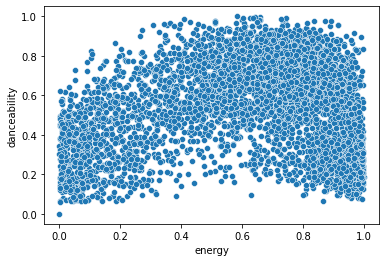

KMeans(n_clusters=5)


712.695644284702

In [4]:
df_audio_features=pd.read_csv(path).dropna()
type(df_audio_features)
df_audio_features1=pd.DataFrame(df_audio_features)
df_audio_features1.columns=df_audio_features1.columns.str.replace(' ','')#Removes white spaces in column names
print(df_audio_features1.columns)
df_audio_features1.set_index(['name','artist'])#Indexes
#Outliers deletion
import numpy as np
from scipy import stats
df_audio_features1.drop(['name','artist','id','html','type','duration_ms','time_signature','acousticness','instrumentalness','key','loudness'],axis=1,inplace=True)
df_audio_features1#5235 rows * 7 columns
df_audio_features1[(np.abs(stats.zscore(df_audio_features1)) < 3).all(axis=1)]#4960 rows * 7 columns
# 1. import the transformer
from sklearn.preprocessing import MinMaxScaler
my_min_max=MinMaxScaler(feature_range=(0,1))
# 3. fit the transformer to the data
my_min_max.fit(df_audio_features1)
# 4. use the transformer to transform the data
scaled_audio_features = my_min_max.transform(df_audio_features1)
# 5. reconvert the transformed data back to a DataFrame
recordsscaled=pd.DataFrame(scaled_audio_features,
             index=df_audio_features1.index,
             columns=df_audio_features1.columns)
recordsscaled
sns.scatterplot(data=recordsscaled,x='energy',y='danceability')#Scatterplot for 2 variables
plt.show()#There are outliers 
#sns.scatterplot(data=recordsscaled,x='energy',y='loudness')
#plt.show()#Real correlation between energy and loudness/Should definitely show this graph in presentation
from sklearn.cluster import KMeans
records_kmeans=KMeans(n_clusters=5).fit(recordsscaled) #Creating 10 clusters
print(records_kmeans)
records_kmeans.inertia_#Better: 472.8











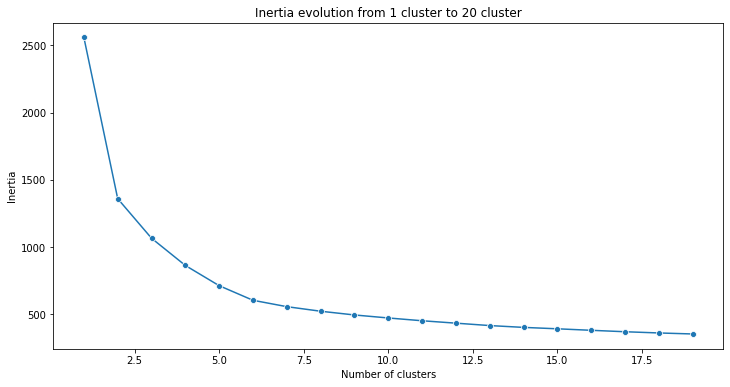

In [ ]:
max_k = 20
inertia = []

for k in range(1, max_k): 
    inertia.append(KMeans(n_clusters=k).fit(recordsscaled).inertia_)

fig, ax = plt.subplots(figsize=(12, 6))
plt.title(f'Inertia evolution from 1 cluster to {max_k} cluster')
sns.lineplot(x=range(1, max_k), y=inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()#Conclusion: inflection point is at 10 approximately. Should create 10 clusters?

In [5]:
from sklearn.metrics import silhouette_score
silhouette_score(recordsscaled, records_kmeans.labels_)#Score = 0.28


0.3441447602639159

In [6]:
columns = recordsscaled.columns

centroids = pd.DataFrame(records_kmeans.cluster_centers_)
centroids.columns = columns
centroids['cluster_name']=centroids.index
centroids


,danceability,energy,mode,speechiness,liveness,valence,tempo,cluster_name
0,0.380484,0.599125,1.443290e-15,0.087148,0.185582,0.215955,0.548477,0
1,0.691534,0.691843,1.000000e+00,0.088526,0.187600,0.710383,0.563458,1
2,0.341206,0.880443,1.000000e+00,0.112082,0.207819,0.243782,0.574097,2
3,0.715192,0.710508,2.553513e-15,0.102170,0.193684,0.663760,0.559024,3
4,0.393319,0.196403,1.000000e+00,0.049296,0.150822,0.218446,0.507054,4


In [ ]:
recordsscaled

,danceability,energy,mode,speechiness,liveness,valence,tempo
0,0.680455,0.25900,0.0,0.076797,0.987842,0.310660,0.515800
1,0.767322,0.39900,1.0,0.037691,0.108409,0.703553,0.584322
2,0.880041,0.73000,1.0,0.377996,0.125633,0.918782,0.437862
3,0.729059,0.05020,1.0,0.051307,0.391084,0.531980,0.499098
4,0.673216,0.11900,1.0,0.041394,0.105370,0.408122,0.565171
...,...,...,...,...,...,...,...
5230,0.208893,0.06940,1.0,0.051525,0.084296,0.066497,0.410795
5231,0.194416,0.10100,1.0,0.048148,0.070314,0.036041,0.388495
5232,0.061634,0.00093,1.0,0.047277,0.078217,0.034924,0.334469
5233,0.137539,0.02080,1.0,0.045643,0.112462,0.060000,0.313608


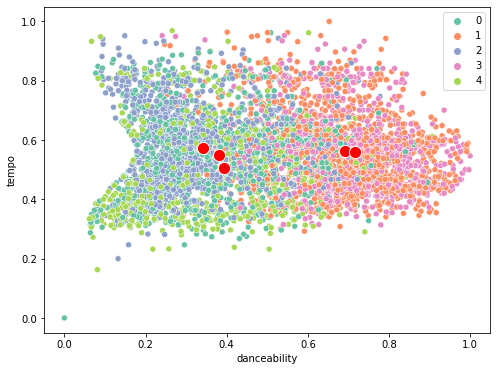

In [7]:
plot_data = pd.DataFrame(recordsscaled)
plot_data.columns = columns
plot_data['cluster'] = records_kmeans.labels_
plot_data.head()

#fig, ax = plt.subplots(figsize=(8, 6))
#sns.scatterplot(data=plot_data, x='energy', y='loudness', hue='cluster', palette='Set2')
#sns.scatterplot(data=centroids, x='energy', y='loudness', color='red', s=150)
#for i in range(centroids.shape[0]):
    #plt.text(
        #x=centroids['energy'][i], 
        #y=centroids['loudness'][i],
        #s=centroids['cluster_name'][i], 
        #size=10
    #)
#plt.show()

fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(data=plot_data, x='danceability', y='tempo', hue='cluster', palette='Set2')
sns.scatterplot(data=centroids, x='danceability', y='tempo', color='red', s=150)
for i in range(centroids.shape[0]):
    plt.text(
        x=centroids['danceability'][i], 
        y=centroids['tempo'][i],
        s=centroids['cluster_name'][i], 
        size=1
    )
plt.show()


In [ ]:
plot_data

,danceability,energy,mode,speechiness,liveness,valence,tempo,cluster
0,0.680455,0.25900,0.0,0.076797,0.987842,0.310660,0.515800,18
1,0.767322,0.39900,1.0,0.037691,0.108409,0.703553,0.584322,12
2,0.880041,0.73000,1.0,0.377996,0.125633,0.918782,0.437862,6
3,0.729059,0.05020,1.0,0.051307,0.391084,0.531980,0.499098,15
4,0.673216,0.11900,1.0,0.041394,0.105370,0.408122,0.565171,15
...,...,...,...,...,...,...,...,...
5230,0.208893,0.06940,1.0,0.051525,0.084296,0.066497,0.410795,5
5231,0.194416,0.10100,1.0,0.048148,0.070314,0.036041,0.388495,5
5232,0.061634,0.00093,1.0,0.047277,0.078217,0.034924,0.334469,5
5233,0.137539,0.02080,1.0,0.045643,0.112462,0.060000,0.313608,5
